# Convert the Adjacency Matrices into Social Network Graph

In [61]:
arr=[]
fin_arr=[]
for i in range(1,34):
    for j in range(i+1,34):
        arr = [i,j]
        fin_arr.append(arr)


In [ ]:
import os
import numpy as np
arr=[]
fin_arr=[]
for i in range(1,34):
    for j in range(i+1,34):
        arr = [i,j]
        fin_arr.append(arr)


# Folder Structure
# ----Main Folder -------------------> (SAMPLES_ADDR)
#   |------Advertisment1
#   |    |------Subject1
#   |    |    |----Alpha
#   |    |    |  |----Segment1
#   |    |    |  |----Segment2
#   |    |    |  ........
#   |    |    |  |----SegmentLast
#   |    |    |
#   |    |    |----Beta
#   |    |    |  |----Segment1
#   |    |    |  |----Segment2
#   |    |    |  ........
#   |    |    |  |----SegmentLast
#   |    |    |
#   |    |    ......
#   |    |
#   |    |------Subject2
#   |    |    ......
#   |    |
#   |    ......
#   |
#   |------Advertisment2
#   |    ......
#   |
#   .....
#   |______AdvertismentLast
#        ......

# DO NOT append the addresses with a slash
SAMPLES_ADDR = "./adj_matrices"
SAVE_LOCATION = "./fin"

# Main Program
def main():
    for advertisment in os.listdir(SAMPLES_ADDR):
        if(advertisment != '.DS_Store'):
            if not os.path.exists(SAMPLES_ADDR + '/' + advertisment):
                continue    # Skip files in the folder
            for subject in os.listdir(SAMPLES_ADDR + '/' + advertisment):
                if(subject != '.DS_Store'):
                    print(subject, ":")
                    for freq_band in os.listdir(SAMPLES_ADDR + '/' + advertisment + '/' + subject):
                        # freq_band is in [alpha, beta, gamma, delta, theta]
                        try:
                            segments_list = os.listdir(SAMPLES_ADDR + '/' + advertisment + '/' + subject + '/' + freq_band)
                        except NotADirectoryError:
                            continue    # Skip files in the folder
                        segments_score = np.zeros((33 * 16,1))
                        # segments_score is a 528 x 300 matrix and is written to the file in the end.
                        for i in range(1,len(segments_list)+1):
                            
                            segment_id = i
                            segment_addr = SAMPLES_ADDR + '/' + advertisment + '/' + subject + '/' + freq_band + '/' + str(i)+".csv"
                            segment = np.loadtxt(open(segment_addr, "rb"), delimiter=",")

                            channels_score_col = np.empty((0, 0), dtype=np.float32)
                            for i in range(33):

                                channels_score_col = np.append(channels_score_col, segment[i, i+1:])
                                
                            channels_score_col = channels_score_col.reshape(-1,1)
                            segments_score = np.append(segments_score,channels_score_col, axis = 1)
                        segments_score = segments_score[:,1:]   
                        segments_score = np.append(fin_arr,segments_score,axis=1)
                        save_directory = SAVE_LOCATION + '/' + advertisment + '/' + subject
                        if not os.path.exists(save_directory):
                            os.makedirs(save_directory)
                        np.savetxt(
                            save_directory + '/' + freq_band + ".csv",
                            segments_score,fmt='%-4.3f',
                            delimiter=','
                        )
    return

if __name__ == "__main__":
    main()

# Apply KMeans Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [11]:
dataset = pd.read_csv('./fin/1/ECA-Anish-October31_Step1_9_1.mat/alpha.csv')
X = dataset.iloc[: ,2:].values

In [5]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 400, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

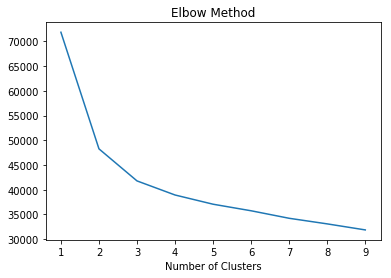

In [79]:
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
print(np.shape(y_kmeans), np.shape(X))

(527,) (527, 325)


In [89]:
z=0;
one = 0;
two=0;
for i in y_kmeans:
    if(i==0):
        z+=1
    elif(i==1):
        one+=1
    else:
        two+=1
print(z)
print(one)
print(two)

213
181
133


# Silhouette Score

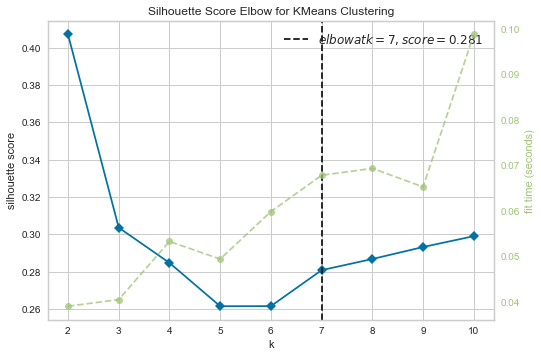

In [253]:
# KElbowVisualizer method
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(random_state = 11)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)    
visualizer.show(outpath="filename.eps", format='eps', dpi=100, bbox_inches='tight')

# Hierarchical Clustering

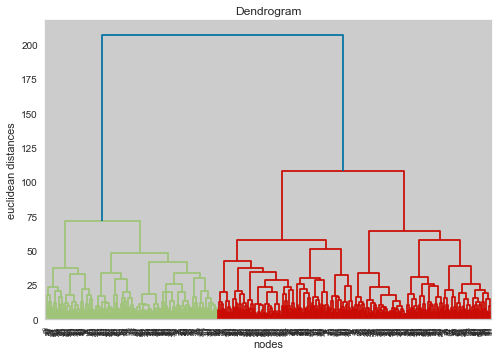

In [265]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./fin/1/ECA-Anish-October31_Step1_9_1.mat/alpha.csv')
X = dataset.iloc[:, 3:].values


# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('nodes')
plt.ylabel('euclidean distances')
plt.show()



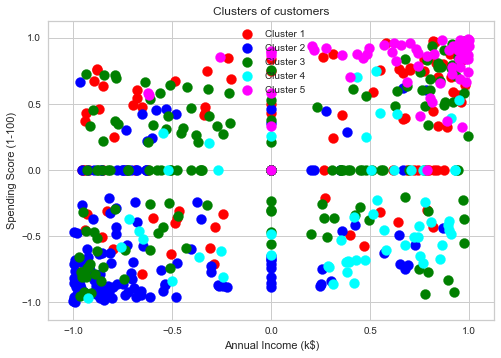

In [255]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Boxplot 

In [14]:
import os
import seaborn as sns

In [7]:
os.listdir("./fin/CLOWNS/ECA-Anish-October31_Step1_9_CLOWNS.mat")

['beta.csv', 'gamma.csv', 'delta.csv', 'alpha.csv', 'theta.csv']

In [38]:
df = pd.read_csv("./fin/CLOWNS/ECA-Anish-October31_Step1_9_CLOWNS.mat/alpha.csv",header = None)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,1.0,2.0,0.837,0.850,0.869,0.979,0.796,0.269,0.716,0.820,...,0.755,-0.303,-0.651,0.000,0.841,0.769,0.577,0.535,0.000,0.365
1,1.0,3.0,-0.215,0.347,0.581,-0.801,0.000,-0.305,0.424,-0.568,...,0.981,-0.420,0.000,0.495,0.604,0.720,0.355,-0.250,-0.698,-0.672
2,1.0,4.0,0.287,0.973,0.962,0.866,0.698,0.000,0.769,0.489,...,0.954,0.865,0.895,0.850,0.604,0.000,0.484,0.420,0.775,0.241
3,1.0,5.0,-0.824,-0.909,0.000,-0.869,-0.617,-0.540,0.462,-0.538,...,0.511,0.000,0.610,-0.251,0.478,0.579,0.674,-0.204,-0.706,-0.750
4,1.0,6.0,-0.290,0.843,0.972,0.623,0.498,0.000,0.653,0.000,...,0.623,0.390,0.904,0.723,0.000,-0.378,0.282,0.000,0.566,-0.615


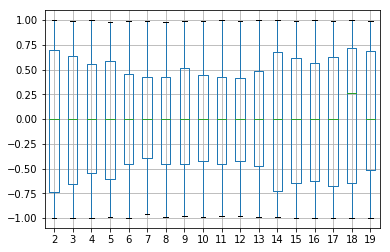

In [35]:
boxplot = df.boxplot(column=arr)


In [34]:
arr=[]
for i in range(2,20):
    arr.append(i)

print(arr)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


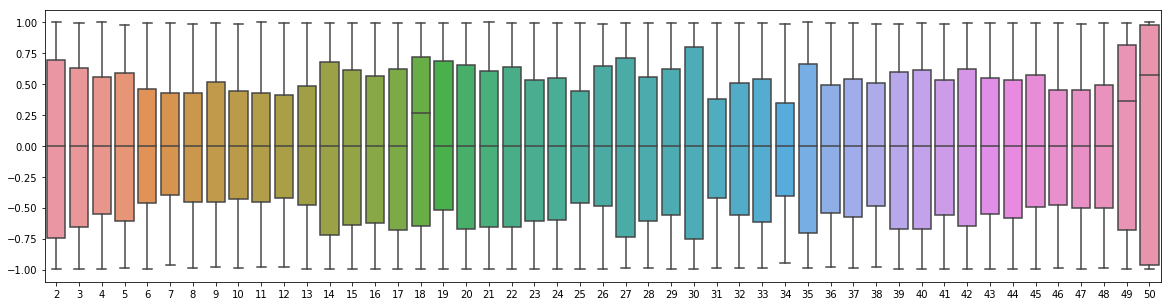

In [60]:
import seaborn as sns

plt.figure(figsize=(20,5)) 
sns.boxplot(data=df.iloc[:,2:51])


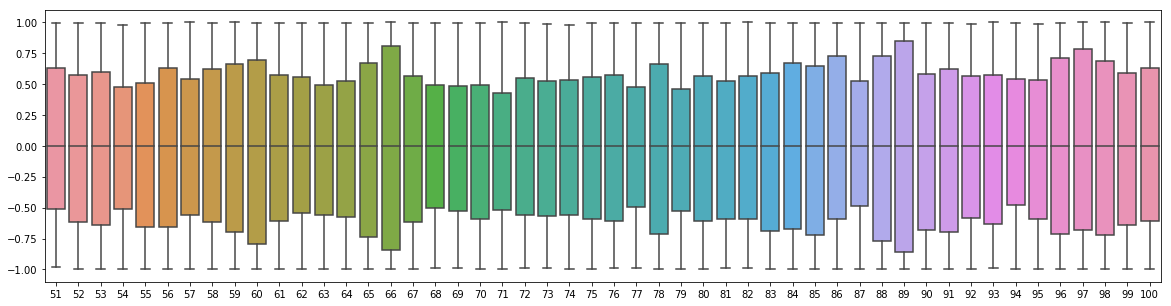

In [53]:
plt.figure(figsize=(20,5)) 
sns.boxplot(data=df.iloc[:,51:101])

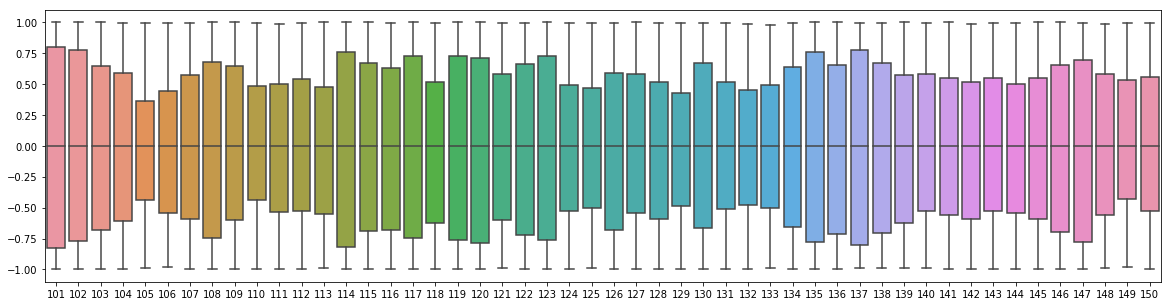

In [54]:
plt.figure(figsize=(20,5)) 
sns.boxplot(data=df.iloc[:,101:151])

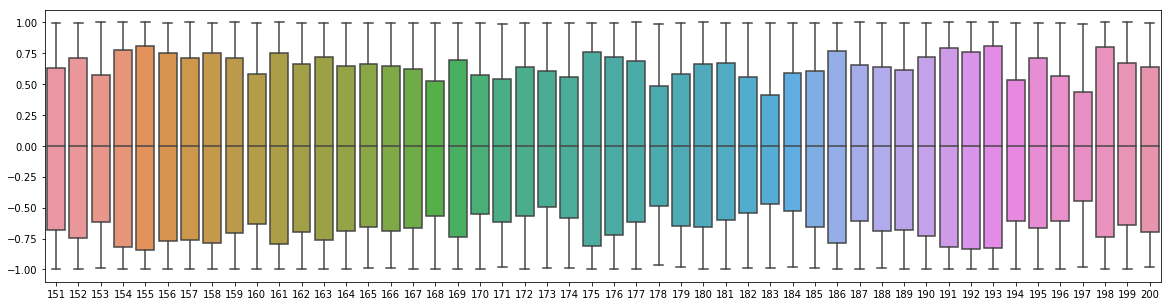

In [55]:
plt.figure(figsize=(20,5)) 
sns.boxplot(data=df.iloc[:,151:201])

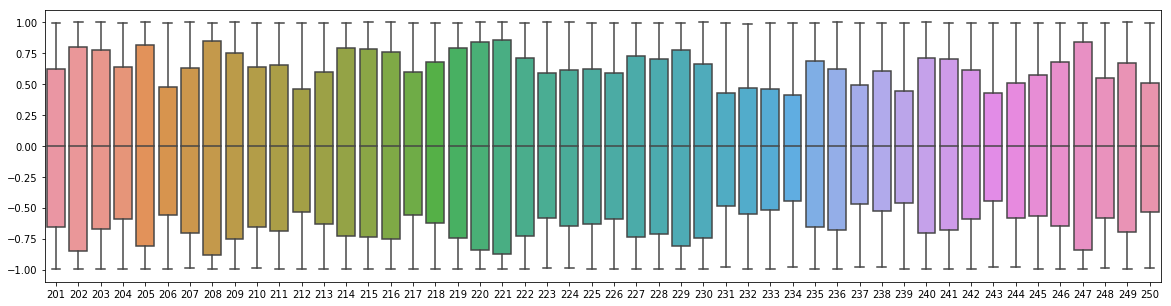

In [56]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df.iloc[:,201:251])

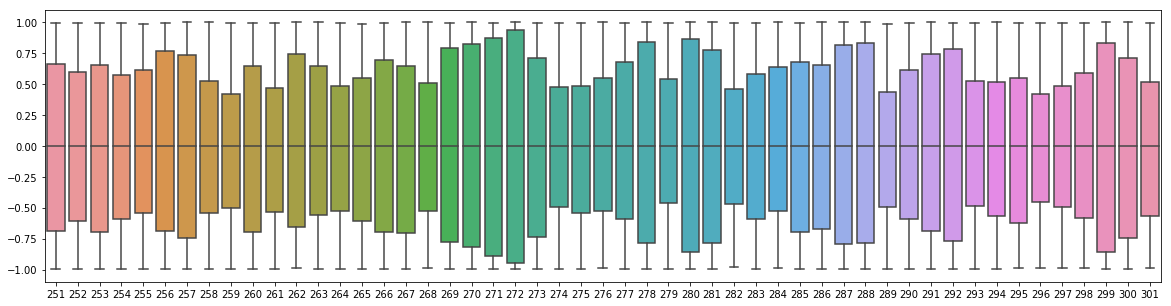

In [57]:
plt.figure(figsize=(20,5)) 
sns.boxplot(data=df.iloc[:,251:302])

In [32]:
for i in range(1000,10000):
    a = str(i*i)
    n = len(a);
    if(a[n-4:n] == str(i)):
        print(i)

9376


# PCA

In [69]:
df = pd.read_csv("./fin/CLOWNS/ECA-Anish-October31_Step1_9_CLOWNS.mat/alpha.csv",header = None)
x = df.iloc[:,2:]

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [71]:
finalDf = pd.concat([principalDf, df.iloc[:,0]], axis = 1)
finalDf = pd.concat([finalDf, df.iloc[:,1]], axis = 1)

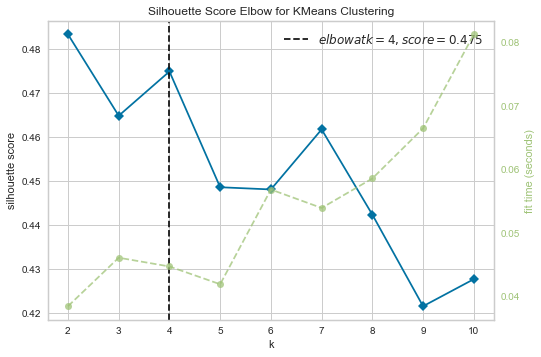

In [101]:
# KElbowVisualizer method
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(random_state = 11)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(principalDf)    
visualizer.show(outpath="filename.eps", format='eps', dpi=100, bbox_inches='tight')

In [103]:
model.cluster_center

array([[-11.79406317,   0.96488887],
       [  8.45684933,   0.16358974],
       [  0.02447521,  -0.2052465 ],
       [ 12.71377565,  -1.5245765 ],
       [ -3.91223548,   5.08851037],
       [ -3.26765566,  -3.16705309],
       [  5.38241142,   2.84684483],
       [  3.33041016,  -4.51409861],
       [  0.95537901,   4.78963621],
       [ -7.93109023,  -1.79020122]])

In [107]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(principalDf)

# Cluster Center

In [110]:
kmeans.cluster_centers_

array([[ 10.13689723,  -0.76724384],
       [-10.22642753,   0.14649115],
       [  2.19081595,   3.86217017],
       [ -1.80758419,  -2.3090141 ]])

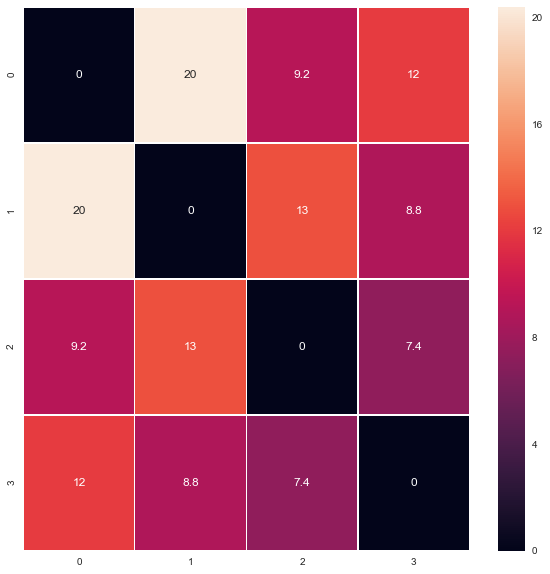

In [112]:
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeans.cluster_centers_)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dists, vmin=0, linewidths=.25, annot=True)
plt.show()


# Source_Target_Labels

In [122]:
File_id = pd.DataFrame(data = y_kmeans
             , columns = ['Cluster_No'])

In [126]:
File_id = pd.concat([File_id, df.iloc[:,0]], axis = 1)
File_id = pd.concat([File_id, df.iloc[:,1]], axis = 1)

In [124]:
File_id

,Cluster_No,0,1
0,0,1.0,2.0
1,0,1.0,3.0
2,0,1.0,4.0
3,2,1.0,5.0
4,2,1.0,6.0
5,2,1.0,7.0
6,2,1.0,8.0
7,1,1.0,9.0
8,0,1.0,10.0
9,0,1.0,11.0


# Size of Each Cluster

In [120]:
zero=0
one = 0
two = 0
three = 0
for i in y_kmeans:
    if(i==0):
        zero+=1
    elif(i==1):
        one+=1
    elif(i==2):
        two+=1;
    else:
        three+=1

In [121]:
print(zero)
print(one)
print(two)
print(three)

133
129
113
153
